# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [19]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [20]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467,0.05,-0.1,0.0
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111,0.05,-0.1,0.0
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232,0.05,-0.1,0.0
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506,0.05,-0.1,0.0
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961,0.05,-0.1,0.0


## Feature Selection

In [21]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [22]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.092920,-0.196129,-0.221155,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.048761,-0.165199,-0.153981,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.046947,-0.162465,-0.134006,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.080247,-0.151546,-0.128707,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.119633,-0.150856,-0.142704,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961


### Variance Analysis

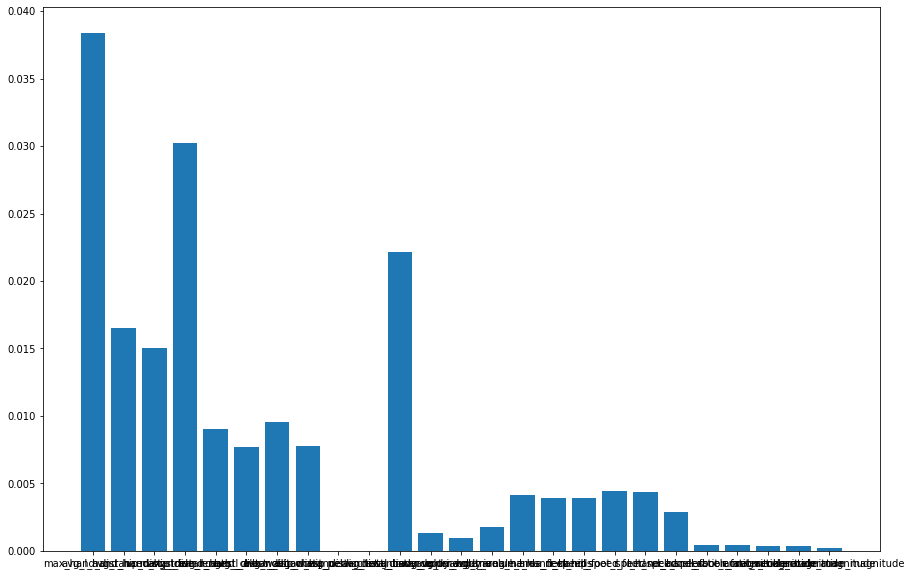

max_hand_distance  -  0.038362575527205574
avg_l_hand_hip_distance  -  0.016484468656518998
avg_r_hand_hip_distance  -  0.015065966758689042
max_stride_length  -  0.030201084814121367
avg_l_hand_chest_distance  -  0.00899875642858216
avg_r_hand_chest_distance  -  0.0076767444412771295
avg_l_elbow_hip_distance  -  0.009538984590500841
avg_r_elbow_hip_distance  -  0.007744355313131842
avg_chest_pelvis_distance  -  1.1936837414096779e-15
avg_neck_chest_distance  -  1.644723481244834e-15
avg_total_body_volume  -  0.022166903533682315
avg_lower_body_volume  -  0.0013621885800554673
avg_upper_body_volume  -  0.000965779663044737
avg_triangle_area_hands_neck  -  0.0018044017404372857
avg_triangle_area_feet_hips  -  0.00414237600901226
l_hand_speed  -  0.0038830161603672507
r_hand_speed  -  0.003929295443277392
l_foot_speed  -  0.004465797744870102
r_foot_speed  -  0.00440000622622654
neck_speed  -  0.002888032681131847
l_hand_acceleration_magnitude  -  0.0004347576093920629
r_hand_acceleratio

In [23]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [25]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [26]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.092920,-0.196129,-0.221155,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.048761,-0.165199,-0.153981,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.046947,-0.162465,-0.134006,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.080247,-0.151546,-0.128707,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.119633,-0.150856,-0.142704,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961


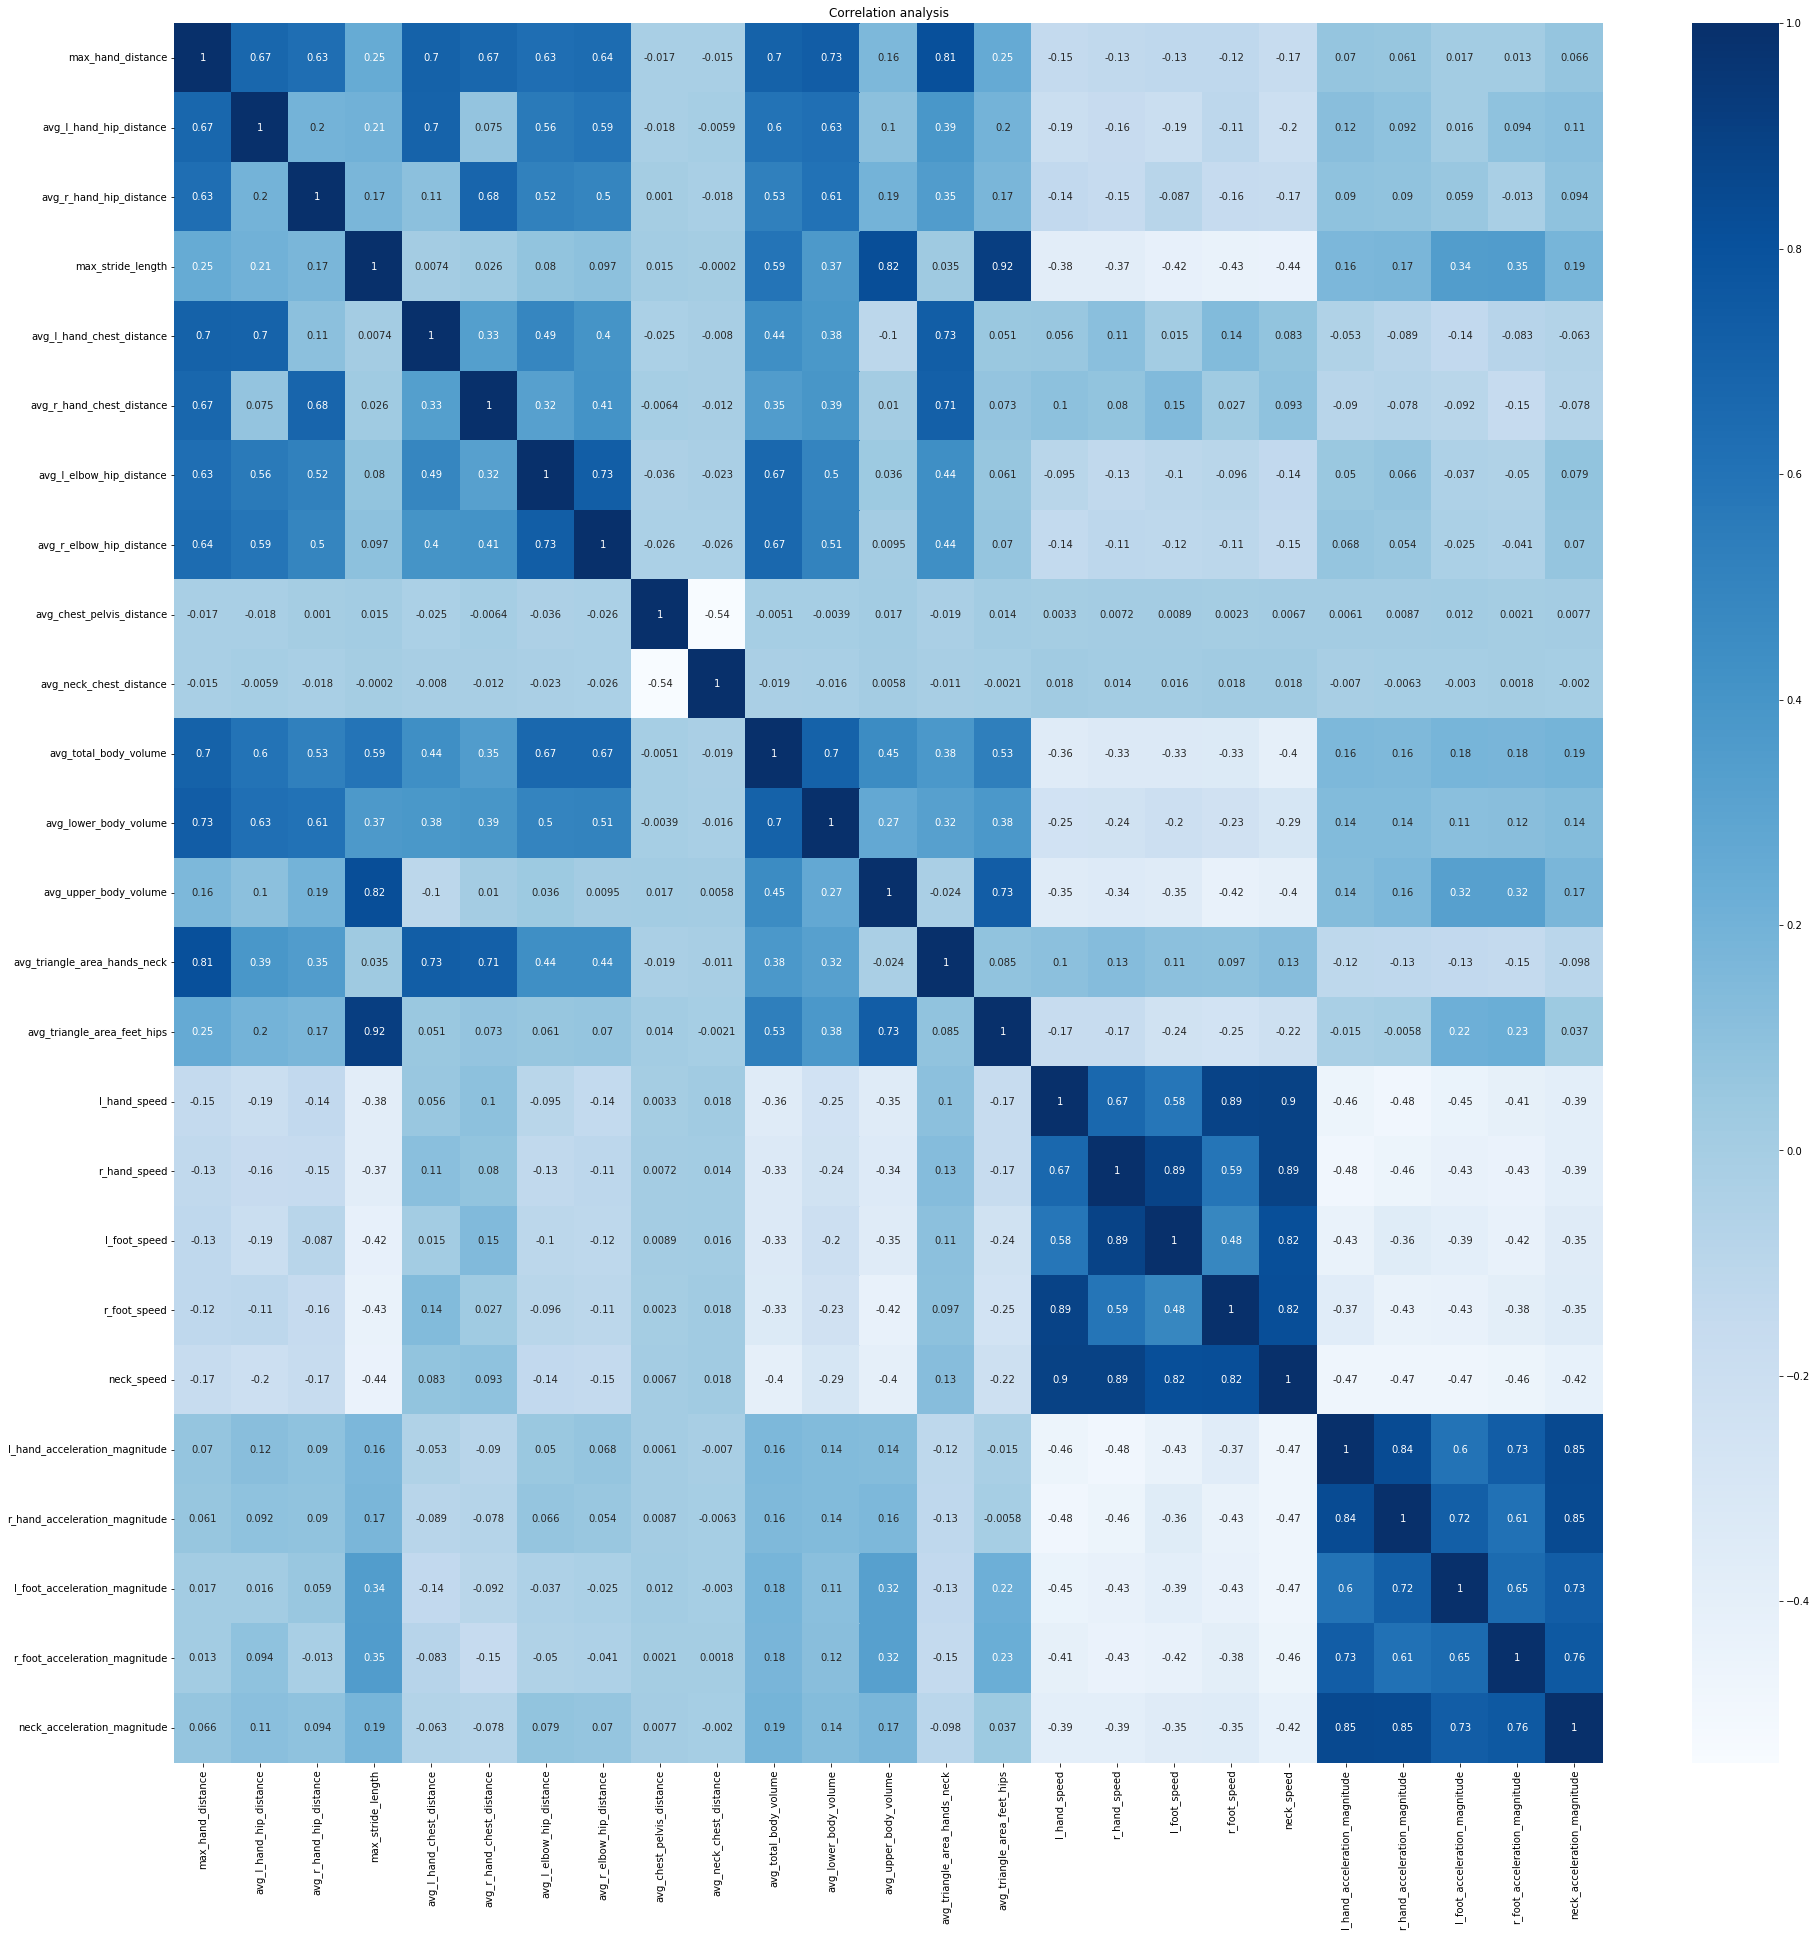

In [27]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [28]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [29]:
df = pd.read_csv('datasets/BANDAI_5frame.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.311315
avg_l_hand_hip_distance          0.156390
avg_r_hand_hip_distance          0.113808
max_stride_length                0.232206
avg_l_hand_chest_distance        0.189786
avg_r_hand_chest_distance        0.185067
avg_l_elbow_hip_distance         0.001353
avg_r_elbow_hip_distance         0.009074
avg_chest_pelvis_distance        0.019779
avg_neck_chest_distance          0.000548
avg_total_body_volume            0.255931
avg_lower_body_volume            0.336550
avg_upper_body_volume            0.185198
avg_triangle_area_hands_neck     0.203759
avg_triangle_area_feet_hips      0.199753
l_hand_speed                     0.175561
r_hand_speed                     0.169728
l_foot_speed                     0.148621
r_foot_speed                     0.148173
neck_speed                       0.180096
l_hand_acceleration_magnitude    0.138067
r_hand_acceleration_magnitude    0.130046
l_foot_acceleration_ma

## Outliers

In [30]:
from scipy import stats

In [31]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')
print(data.shape)

(78551, 28)


In [32]:
data.iloc[0]

max_hand_distance                0.433596
avg_l_hand_hip_distance          0.130036
avg_r_hand_hip_distance          0.335475
max_stride_length                0.538619
avg_l_hand_chest_distance        0.184473
avg_r_hand_chest_distance        0.310089
avg_l_elbow_hip_distance         0.210679
avg_r_elbow_hip_distance         0.093915
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.247232
avg_lower_body_volume            0.079520
avg_upper_body_volume            0.108071
avg_triangle_area_hands_neck     0.070847
avg_triangle_area_feet_hips      0.176692
l_hand_speed                    -0.092920
r_hand_speed                    -0.196129
l_foot_speed                    -0.221155
r_foot_speed                    -0.137483
neck_speed                      -0.139467
l_hand_acceleration_magnitude    0.092920
r_hand_acceleration_magnitude    0.196129
l_foot_acceleration_magnitude    0.221155
r_foot_acceleration_magnitude    0

In [33]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(71834, 28)

In [34]:
data.iloc[0]

max_hand_distance                0.348051
avg_l_hand_hip_distance          0.145184
avg_r_hand_hip_distance          0.256784
max_stride_length                0.455501
avg_l_hand_chest_distance        0.197954
avg_r_hand_chest_distance        0.284215
avg_l_elbow_hip_distance         0.172405
avg_r_elbow_hip_distance         0.104876
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.213422
avg_lower_body_volume            0.060301
avg_upper_body_volume            0.095905
avg_triangle_area_hands_neck     0.062156
avg_triangle_area_feet_hips      0.140964
l_hand_speed                    -0.048761
r_hand_speed                    -0.165199
l_foot_speed                    -0.153981
r_foot_speed                    -0.072441
neck_speed                      -0.095084
l_hand_acceleration_magnitude    0.048935
r_hand_acceleration_magnitude    0.032804
l_foot_acceleration_magnitude    0.070625
r_foot_acceleration_magnitude    0

In [35]:
data.to_csv(r'datasets/O_BANDAI_5frame.csv', index = False)